In [27]:
import pandas as pd
from sklearn.linear_model import logistic

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
claimants = pd.read_csv('D:\\Jupyter\\classroom\\Logistic Regression\\claimants.csv')

In [30]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [31]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [32]:
claimants.shape

(1340, 7)

In [33]:
#Dropping the case number columns as it is not required
claimants.drop(['CASENUM'], inplace=True ,axis=1)

In [34]:
claimants.shape

(1340, 6)

In [35]:
# removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [36]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [37]:
# Dividing our data into input and output variable
x = claimants.iloc[:,1:]
y = claimants.iloc[:,0]

In [38]:
#logistic regression & fit the model
from sklearn.linear_model import LogisticRegression


In [39]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [40]:
#predict for x dataset
y_pred = classifier.predict(x)

In [41]:
y_pred_df = pd.DataFrame({'actual_value':y,
                        'predicted_prob': classifier.predict(x)})

In [42]:
y_pred_df

,actual_value,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [43]:
#confusion matrix for the model accurancy

from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [46]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [47]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [48]:
classifier.predict_proba(x)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

Text(0, 0.5, 'true positive rate')

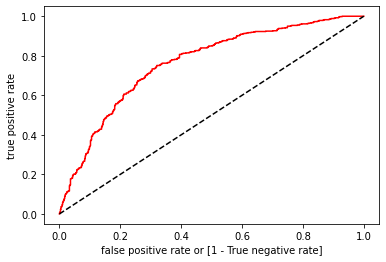

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve (y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color = 'red', label = 'logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1 - True negative rate]')
plt.ylabel('true positive rate')

In [51]:
auc

0.7108589063606365